ARTI308 - Machine Learning
# Seaborn Overview

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [59]:
import seaborn as sns # Import the seaborn library for data visualization
%matplotlib inline # Display matplotlib plots directly in the notebook

UsageError: unrecognized arguments: # Display matplotlib plots directly in the notebook


## Data
Seaborn comes with built-in data sets!

In [60]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn

In [61]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame to preview the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

/tmp/ipython-input-2439079864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill']) # Create a distribution plot for the 'total_bill' column


<Axes: xlabel='total_bill', ylabel='Density'>

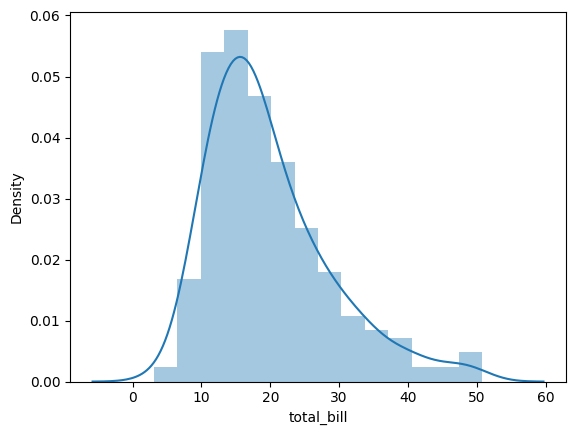

In [62]:
sns.distplot(tips['total_bill']) # Create a distribution plot for the 'total_bill' column
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

/tmp/ipython-input-3099590522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde=False,bins=30) # Create a histogram of 'total_bill' without the Kernel Density Estimate (KDE) plot and with 30 bins


<Axes: xlabel='total_bill'>

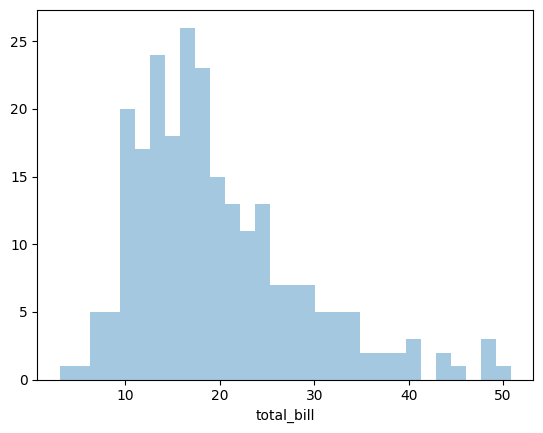

In [63]:
sns.distplot(tips['total_bill'],kde=False,bins=30) # Create a histogram of 'total_bill' without the Kernel Density Estimate (KDE) plot and with 30 bins

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:
* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

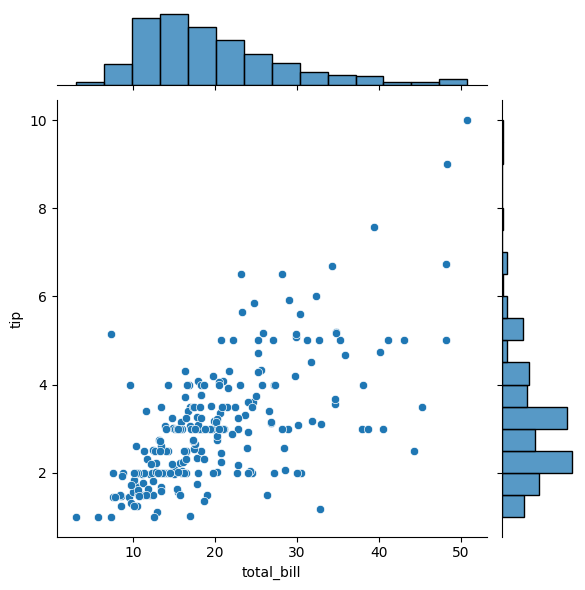

In [64]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter') # Create a joint plot of 'total_bill' and 'tip' with a scatter plot

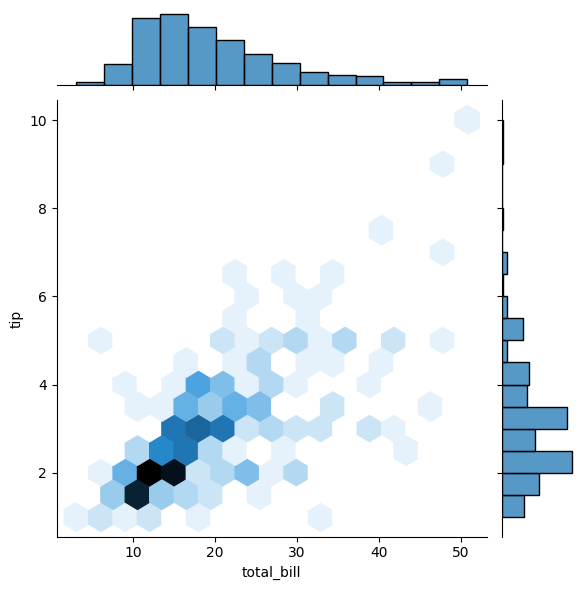

In [65]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') # Create a joint plot of 'total_bill' and 'tip' with a hexagonal binning plot

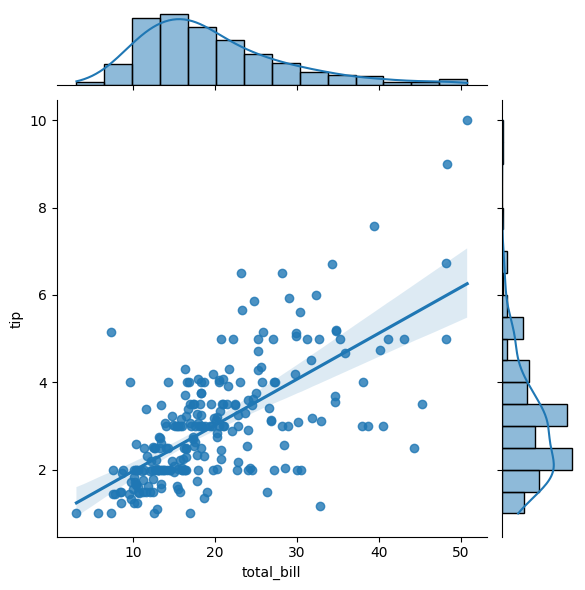

In [66]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # Create a joint plot of 'total_bill' and 'tip' with a regression line

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

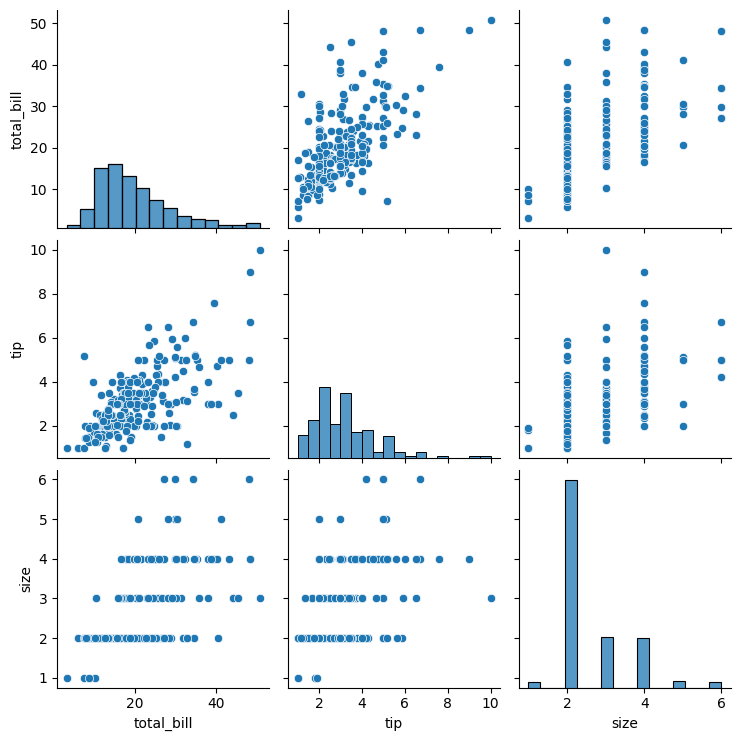

In [67]:
sns.pairplot(tips) # Create a pair plot for all numerical columns in the 'tips' DataFrame

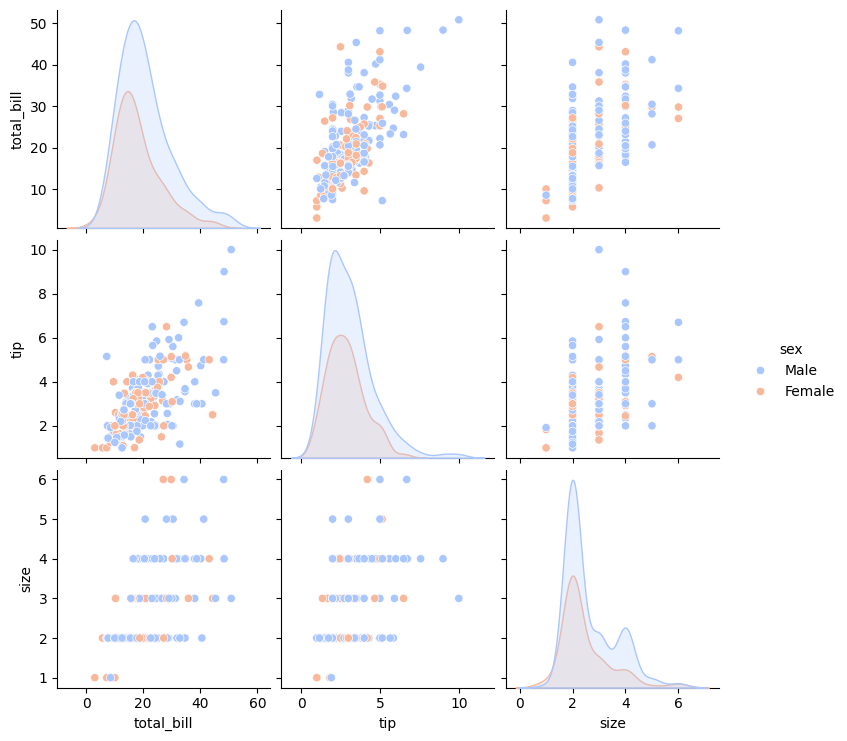

In [68]:
sns.pairplot(tips,hue='sex',palette='coolwarm') # Create a pair plot, coloring points by 'sex' and using the 'coolwarm' palette

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

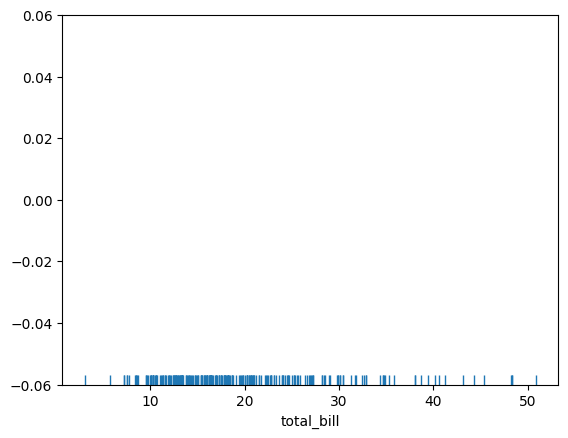

In [69]:
sns.rugplot(tips['total_bill']) # Create a rug plot for the 'total_bill' column, showing individual data points as dashes

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

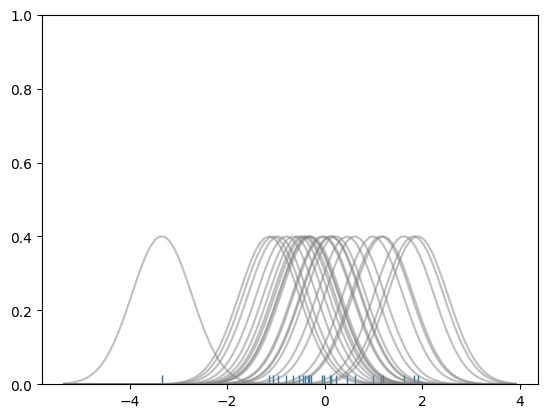

In [70]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
from scipy import stats # Import scipy stats for statistical functions

# Create a random dataset of 25 points
dataset = np.random.randn(25)

# Create a rug plot for the dataset
sns.rugplot(dataset);

# Set up the x-axis limits for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# Generate 100 equally spaced points from x_min to x_max for the x-axis
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth for the KDE, more info at the provided URL
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

# Calculate the bandwidth using Scott's Rule for KDE
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty list to store kernel functions
kernel_list = []

# Plot each basis function (Gaussian distribution for each data point)
for data_point in dataset:

    # Create a Gaussian kernel for each data point and append to the list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    # Scale the kernel for plotting purposes
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    # Plot the individual kernel function
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1) # Set the y-axis limits for the plot

Text(0.5, 0.98, 'Sum of the Basis Functions')

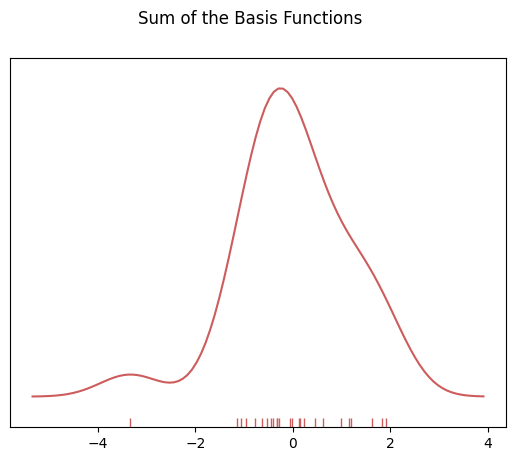

In [71]:
# To get the kde plot we can sum these basis functions.

# Sum all the individual kernel functions to get the final KDE curve
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot the sum of the basis functions (the KDE plot)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rug plot to the KDE plot for visual reference
sns.rugplot(dataset,c = 'indianred')

# Remove y-axis tick marks for a cleaner look
plt.yticks([])

# Set the title of the plot
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

<Axes: xlabel='total_bill', ylabel='Density'>

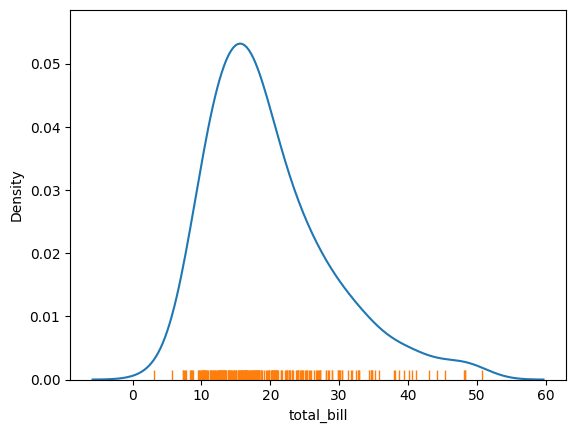

In [72]:
sns.kdeplot(tips['total_bill']) # Create a Kernel Density Estimate (KDE) plot for 'total_bill'
sns.rugplot(tips['total_bill']) # Overlay a rug plot for 'total_bill'

<Axes: xlabel='tip', ylabel='Density'>

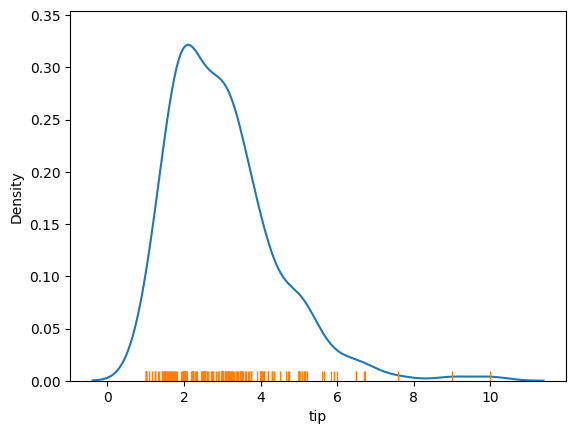

In [73]:
sns.kdeplot(tips['tip']) # Create a Kernel Density Estimate (KDE) plot for 'tip'
sns.rugplot(tips['tip']) # Overlay a rug plot for 'tip'

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [74]:
import seaborn as sns # Import the seaborn library for data visualization
%matplotlib inline # Display matplotlib plots directly in the notebook

UsageError: unrecognized arguments: # Display matplotlib plots directly in the notebook


In [75]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn
tips.head() # Display the first 5 rows of the 'tips' DataFrame to preview the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

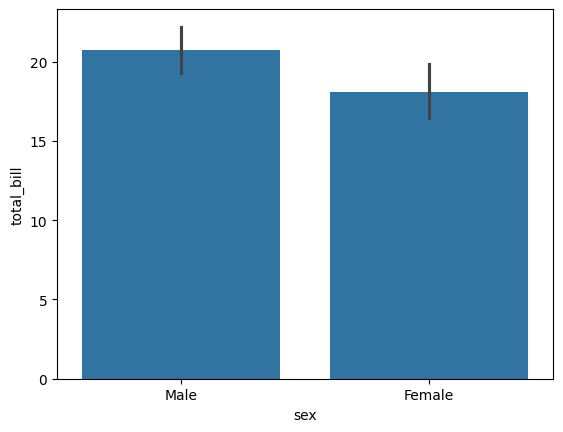

In [76]:
sns.barplot(x='sex',y='total_bill',data=tips) # Create a bar plot showing the mean 'total_bill' for each 'sex'

In [77]:
import numpy as np # Import the numpy library for numerical operations

You can change the estimator object to your own function, that converts a vector to a scalar:

<Axes: xlabel='sex', ylabel='total_bill'>

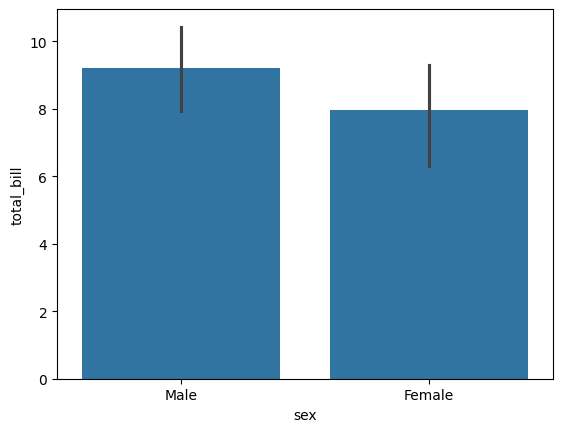

In [78]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # Create a bar plot showing the standard deviation of 'total_bill' for each 'sex'

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

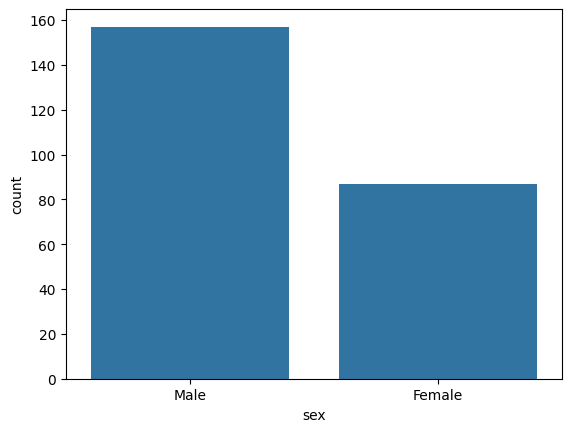

In [79]:
sns.countplot(x='sex',data=tips) # Create a count plot showing the number of occurrences for each 'sex'

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

/tmp/ipython-input-3078343027.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a box plot showing the distribution of 'total_bill' across different 'day's, using the 'rainbow' palette


<Axes: xlabel='day', ylabel='total_bill'>

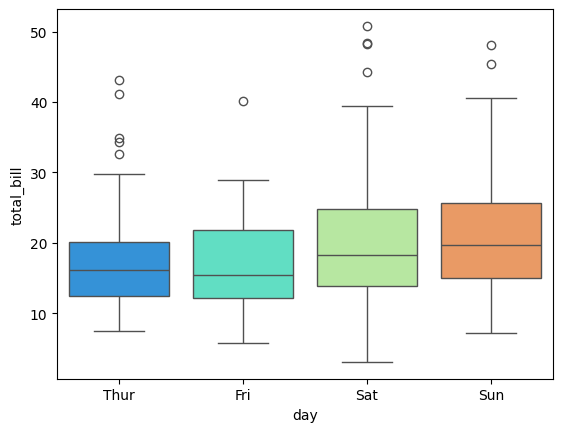

In [80]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a box plot showing the distribution of 'total_bill' across different 'day's, using the 'rainbow' palette

<Axes: >

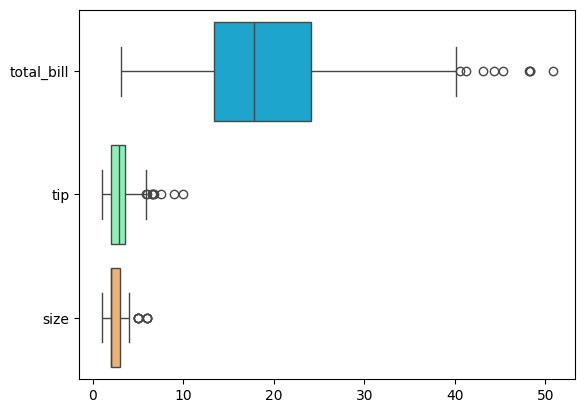

In [81]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h') # Create a horizontal box plot for all numerical columns in the 'tips' DataFrame, using the 'rainbow' palette

<Axes: xlabel='day', ylabel='total_bill'>

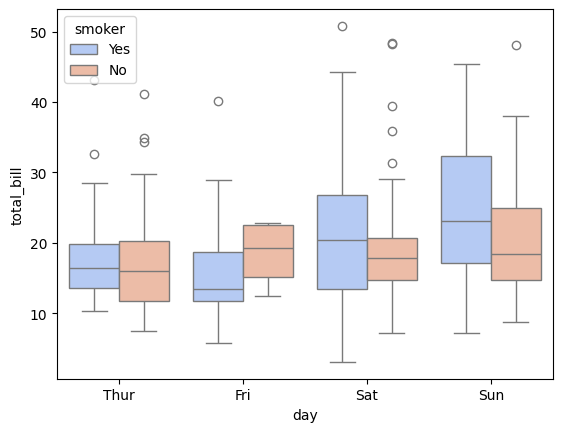

In [82]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm") # Create a box plot of 'total_bill' by 'day', with boxes split by 'smoker' status and using the 'coolwarm' palette

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

/tmp/ipython-input-3927966722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a violin plot showing the distribution of 'total_bill' across different 'day's, using the 'rainbow' palette


<Axes: xlabel='day', ylabel='total_bill'>

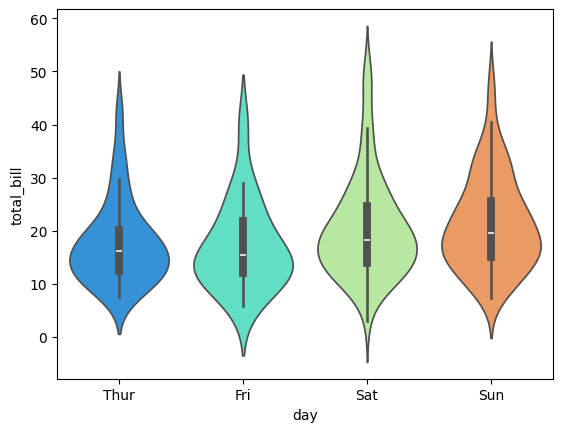

In [83]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow') # Create a violin plot showing the distribution of 'total_bill' across different 'day's, using the 'rainbow' palette

<Axes: xlabel='day', ylabel='total_bill'>

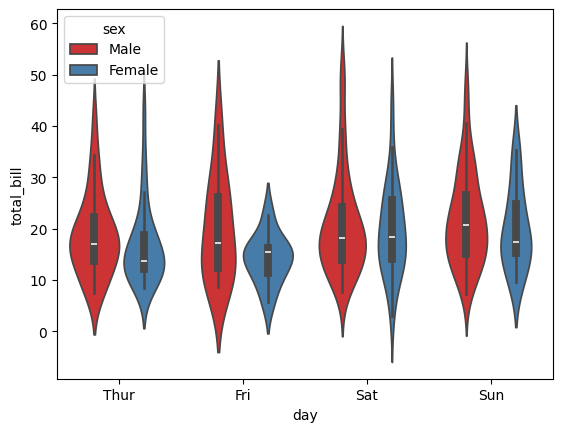

In [84]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1') # Create a violin plot of 'total_bill' by 'day', with violins split by 'sex' and using the 'Set1' palette

<Axes: xlabel='day', ylabel='total_bill'>

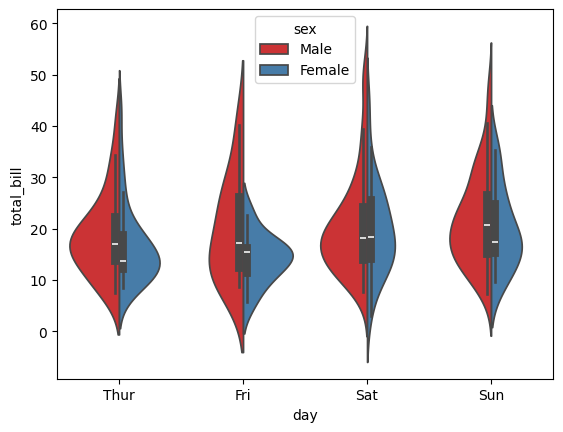

In [85]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1') # Create a violin plot of 'total_bill' by 'day', with violins split for each 'sex' on the same 'day' category, using the 'Set1' palette

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

/tmp/ipython-input-4022163186.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow') # Create a strip plot showing individual data points of 'total_bill' for each 'day', using the 'rainbow' palette


<Axes: xlabel='day', ylabel='total_bill'>

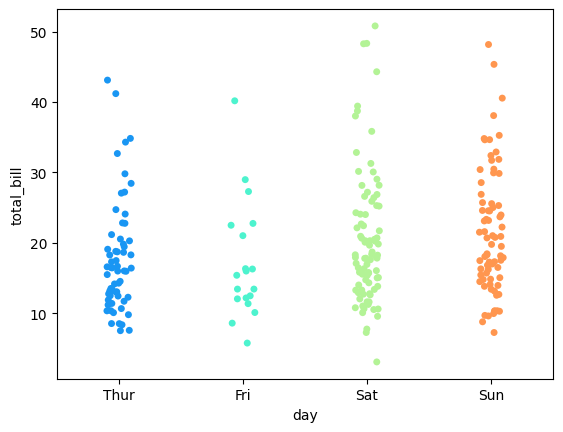

In [86]:
sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow') # Create a strip plot showing individual data points of 'total_bill' for each 'day', using the 'rainbow' palette

/tmp/ipython-input-2258575564.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, palette='rainbow') # Create a strip plot of 'total_bill' by 'day' with jitter to prevent overlap, using the 'rainbow' palette


<Axes: xlabel='day', ylabel='total_bill'>

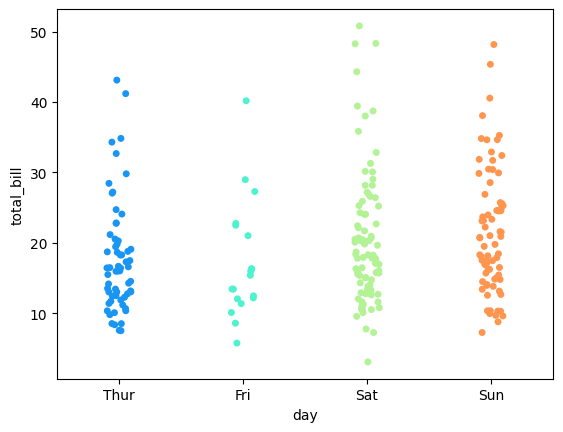

In [87]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, palette='rainbow') # Create a strip plot of 'total_bill' by 'day' with jitter to prevent overlap, using the 'rainbow' palette

<Axes: xlabel='day', ylabel='total_bill'>

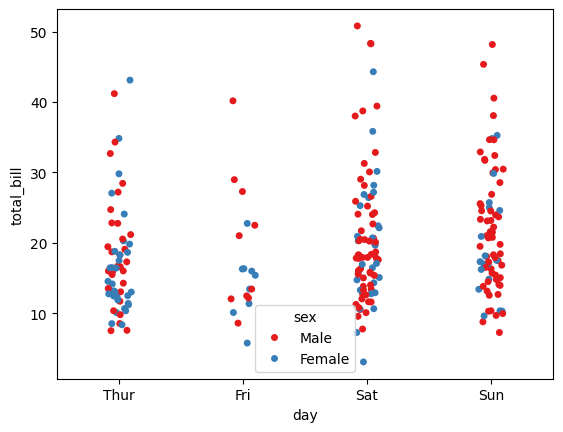

In [88]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1') # Create a strip plot of 'total_bill' by 'day' with jitter, colored by 'sex' and using the 'Set1' palette

<Axes: xlabel='day', ylabel='total_bill'>

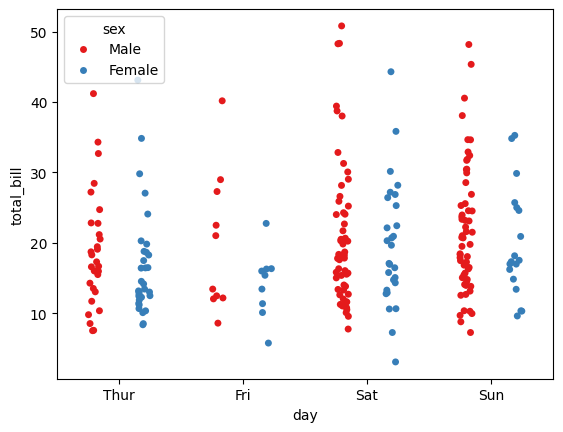

In [89]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',dodge=True) # Create a strip plot of 'total_bill' by 'day' with jitter, colored by 'sex' and dodging (separating) points for different 'sex' groups, using the 'Set1' palette

<Axes: xlabel='day', ylabel='total_bill'>

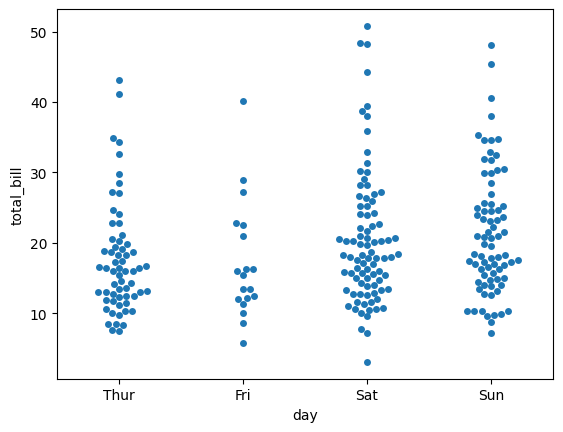

In [90]:
sns.swarmplot(x="day", y="total_bill", data=tips) # Create a swarm plot showing the distribution of 'total_bill' across different 'day's, with points adjusted to prevent overlap

### Combining Categorical Plots

/tmp/ipython-input-1741735547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tip", y="day", data=tips,palette='rainbow') # Create a violin plot of 'tip' by 'day' using the 'rainbow' palette


<Axes: xlabel='tip', ylabel='day'>

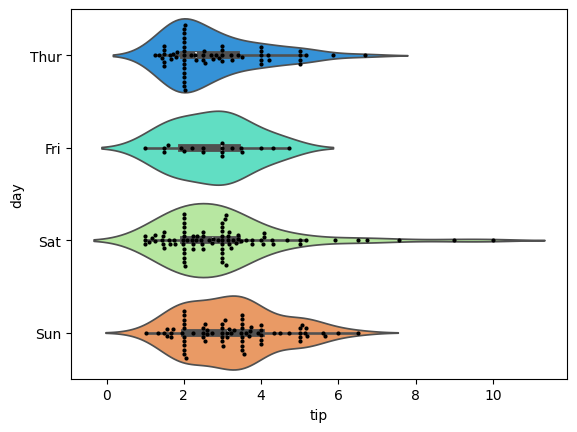

In [91]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow') # Create a violin plot of 'tip' by 'day' using the 'rainbow' palette
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3) # Overlay a swarm plot of the same data, using black points for the swarm

## catplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

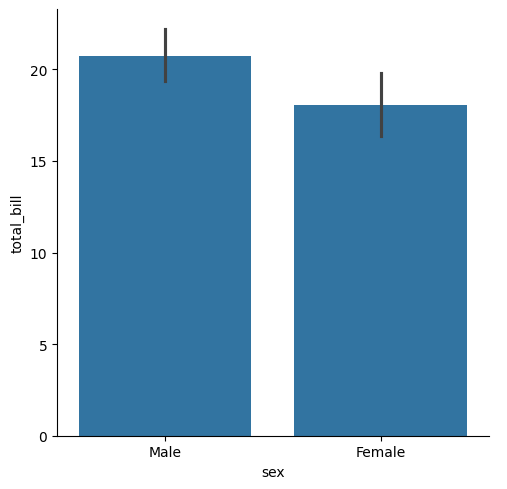

In [92]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar') # Create a categorical plot (bar plot type) showing the mean 'total_bill' for each 'sex'

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [93]:
import seaborn as sns # Import the seaborn library for data visualization
%matplotlib inline # Display matplotlib plots directly in the notebook

UsageError: unrecognized arguments: # Display matplotlib plots directly in the notebook


In [94]:
flights = sns.load_dataset('flights') # Load the built-in 'flights' dataset from seaborn

In [95]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn

In [96]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame to preview the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [97]:
flights.head() # Display the first 5 rows of the 'flights' DataFrame to preview the data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [98]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame to preview the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

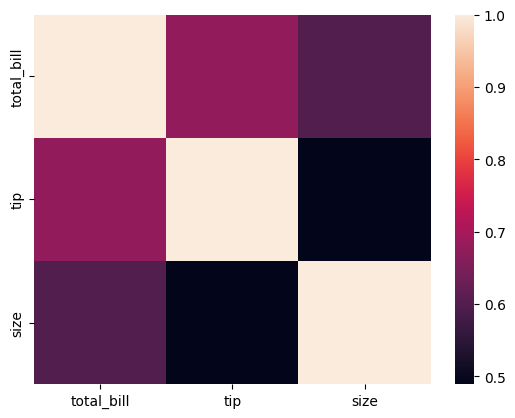

In [99]:
# Matrix form for correlation data
sns.heatmap(tips.corr(numeric_only=True)) # Calculate the correlation matrix for numerical columns in 'tips' and display it as a heatmap

<Axes: >

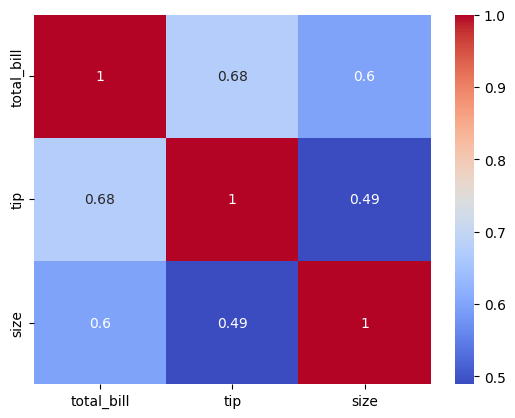

In [100]:
sns.heatmap(tips.corr(numeric_only=True), cmap='coolwarm', annot=True) # Display the correlation heatmap with the 'coolwarm' colormap and annotations showing the correlation values

<Axes: >

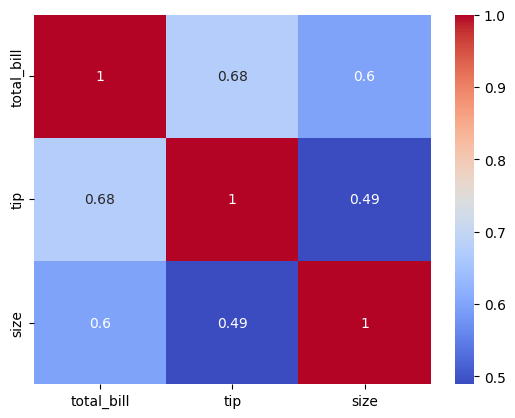

In [101]:
sns.heatmap(tips.corr(numeric_only=True), cmap='coolwarm', annot=True) # Display the correlation heatmap with the 'coolwarm' colormap and annotations showing the correlation values

Or for the flights data:

In [102]:
flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from the 'flights' data, with 'month' as index, 'year' as columns, and 'passengers' as values

/tmp/ipython-input-1948955.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from the 'flights' data, with 'month' as index, 'year' as columns, and 'passengers' as values


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


/tmp/ipython-input-769697816.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvflights = flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from 'flights' data


<Axes: xlabel='year', ylabel='month'>

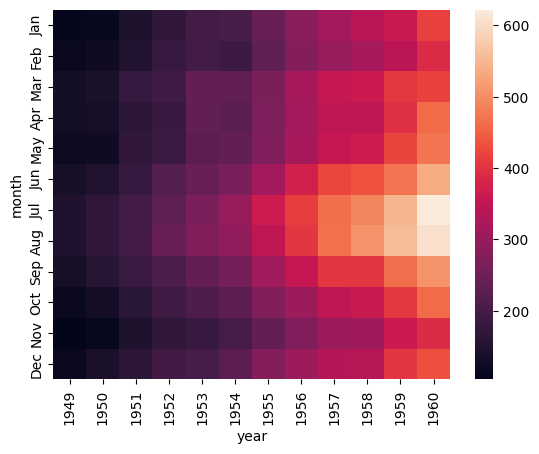

In [103]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year') # Create a pivot table from 'flights' data
sns.heatmap(pvflights) # Display the pivot table as a heatmap

<Axes: xlabel='year', ylabel='month'>

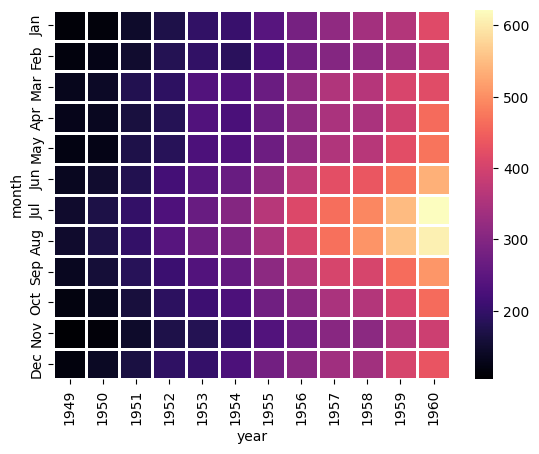

In [104]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1) # Display the flights pivot table as a heatmap using the 'magma' colormap, with white lines between cells

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

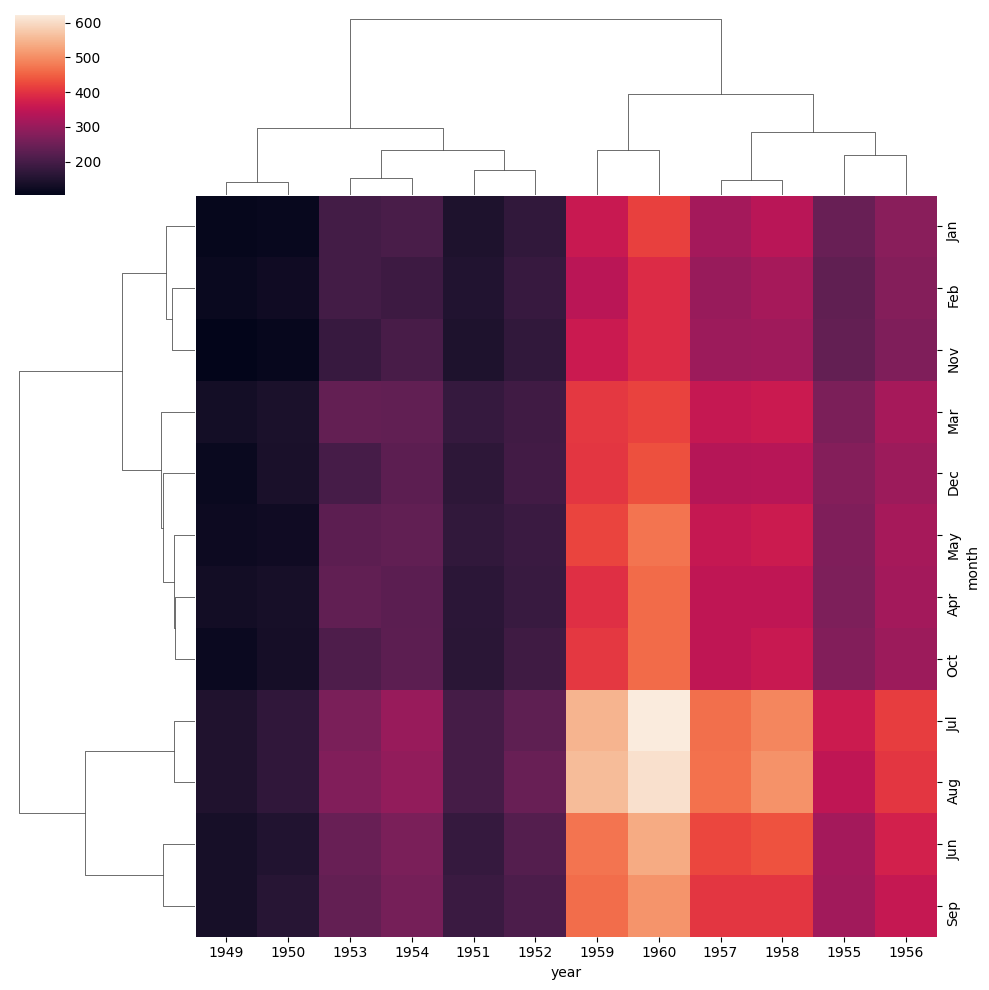

In [105]:
sns.clustermap(pvflights) # Create a clustered heatmap of the flights pivot table, performing hierarchical clustering on rows and columns

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

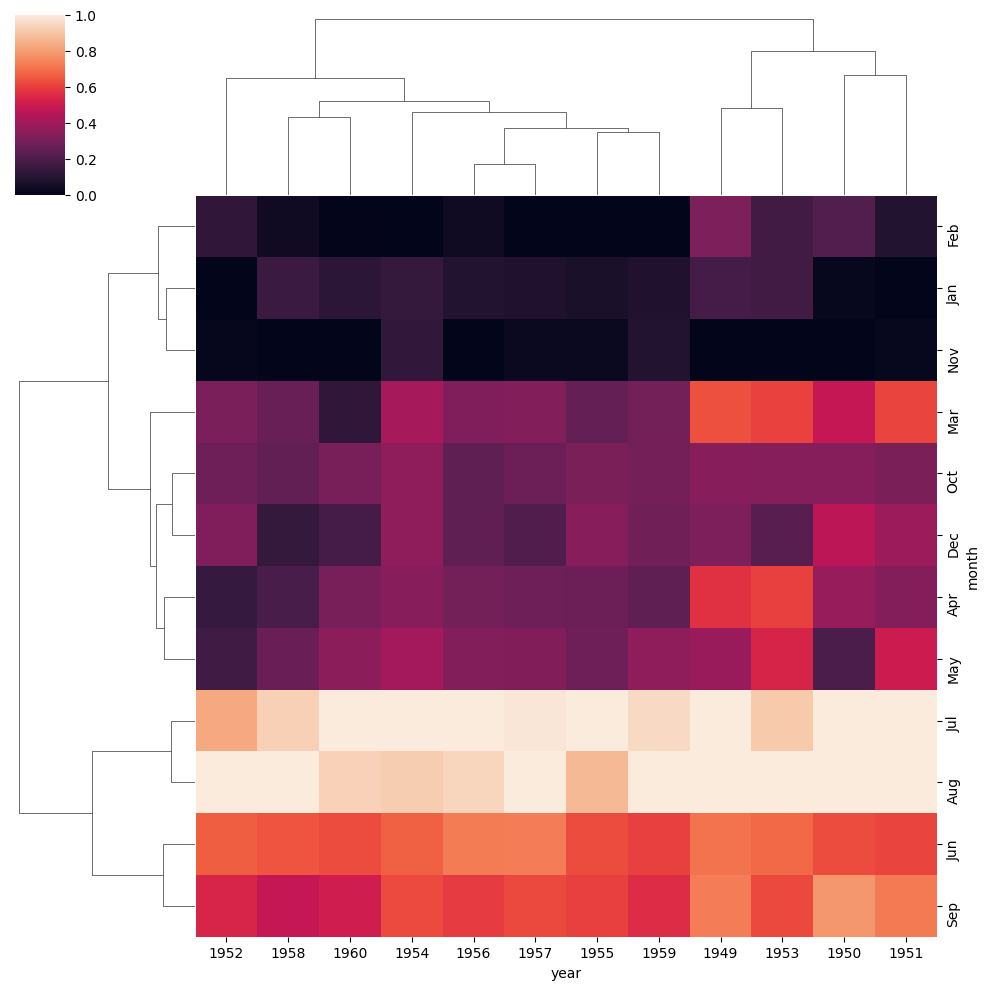

In [106]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,standard_scale=1) # Create a clustered heatmap of the flights pivot table, with data normalized by rows

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [107]:
import seaborn as sns # Import the seaborn library for data visualization
%matplotlib inline # Display matplotlib plots directly in the notebook

UsageError: unrecognized arguments: # Display matplotlib plots directly in the notebook


In [108]:
tips = sns.load_dataset('tips') # Load the built-in 'tips' dataset from seaborn

In [109]:
tips.head() # Display the first 5 rows of the 'tips' DataFrame to preview the data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

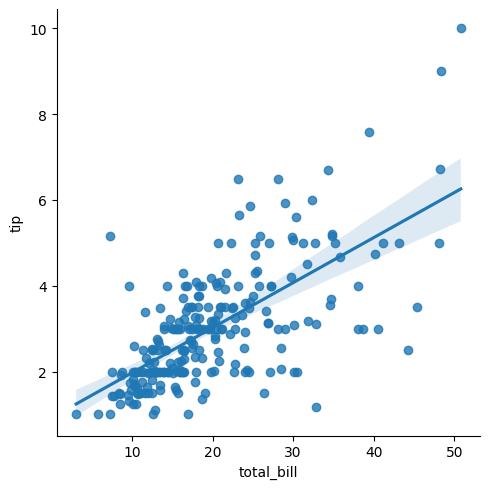

In [110]:
sns.lmplot(x='total_bill',y='tip',data=tips) # Create a linear model plot showing the relationship between 'total_bill' and 'tip'

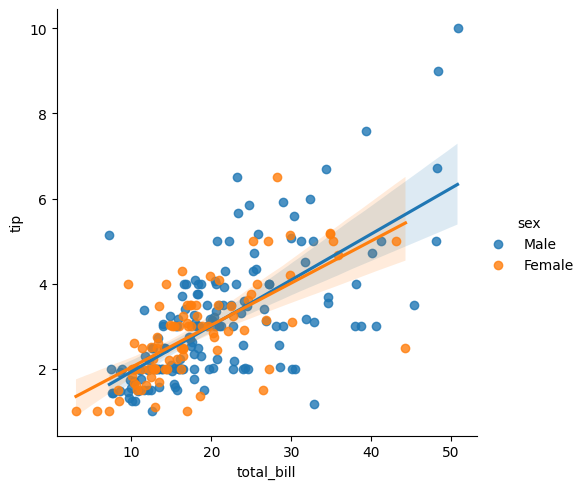

In [111]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex') # Create a linear model plot of 'total_bill' vs 'tip', with points and regression lines colored by 'sex'

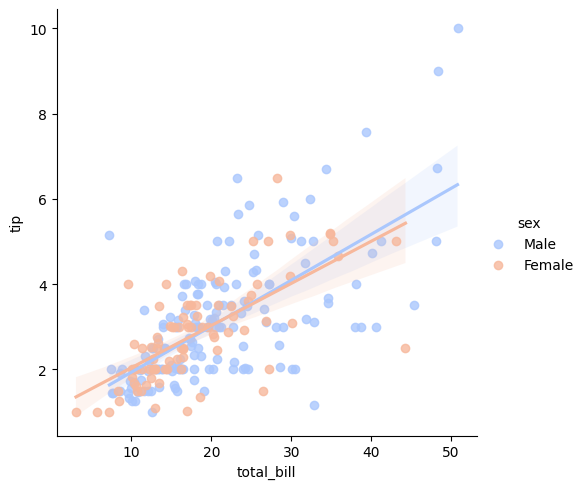

In [112]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm') # Create a linear model plot of 'total_bill' vs 'tip', colored by 'sex' using the 'coolwarm' palette

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

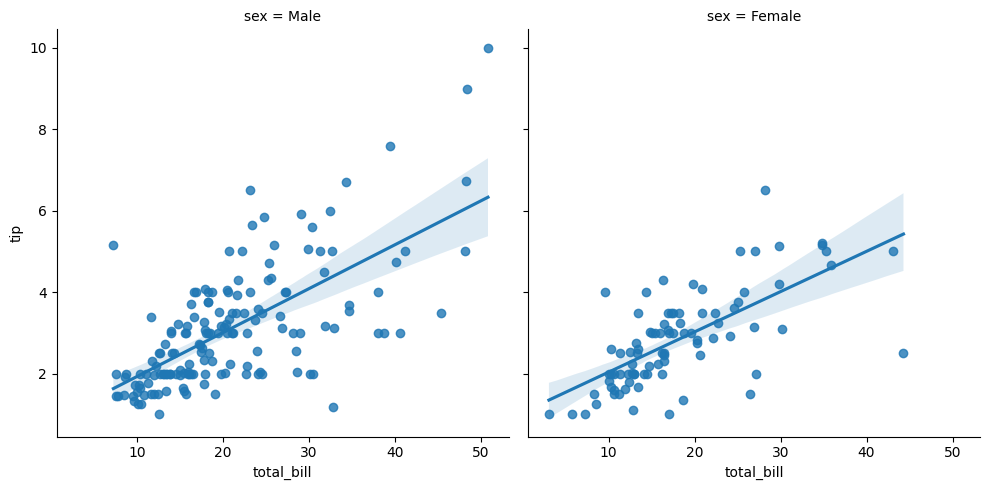

In [113]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex') # Create a linear model plot of 'total_bill' vs 'tip', with separate plots for each 'sex' in columns

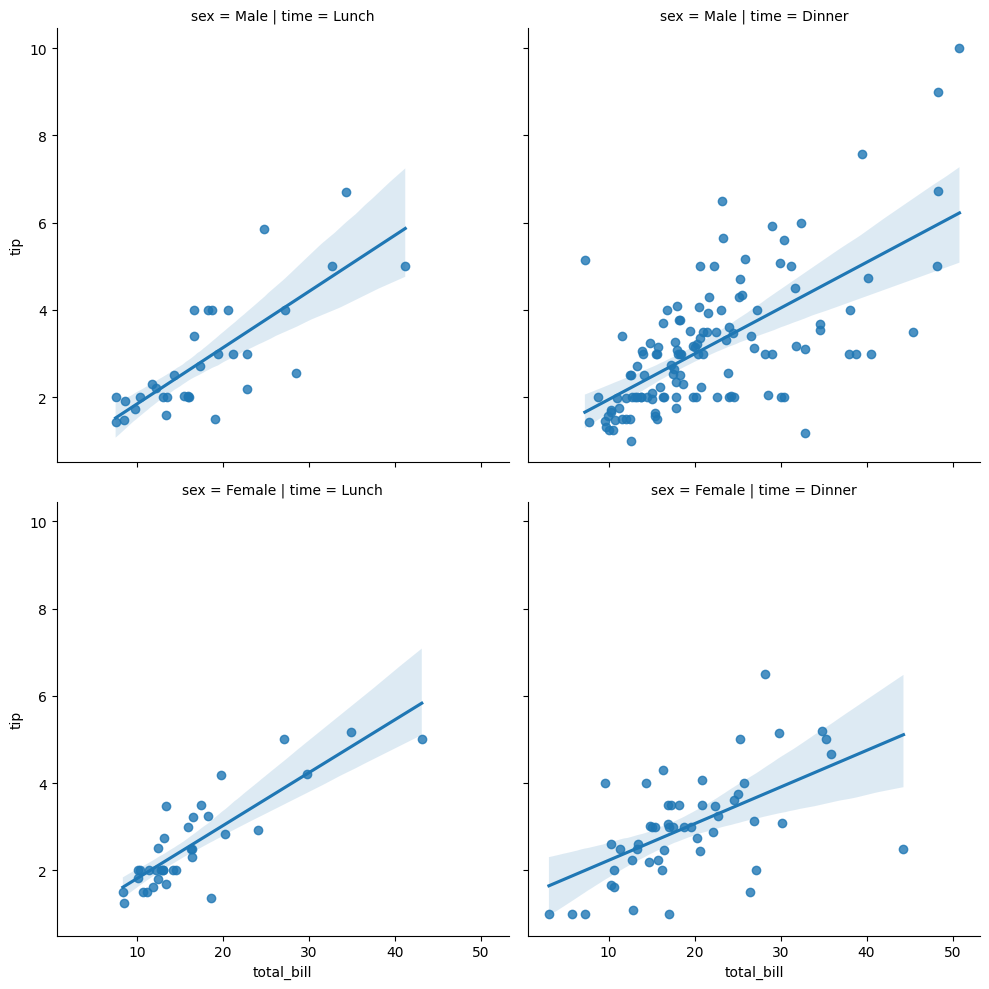

In [114]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips) # Create a linear model plot of 'total_bill' vs 'tip', with separate plots for each 'sex' in rows and 'time' in columns

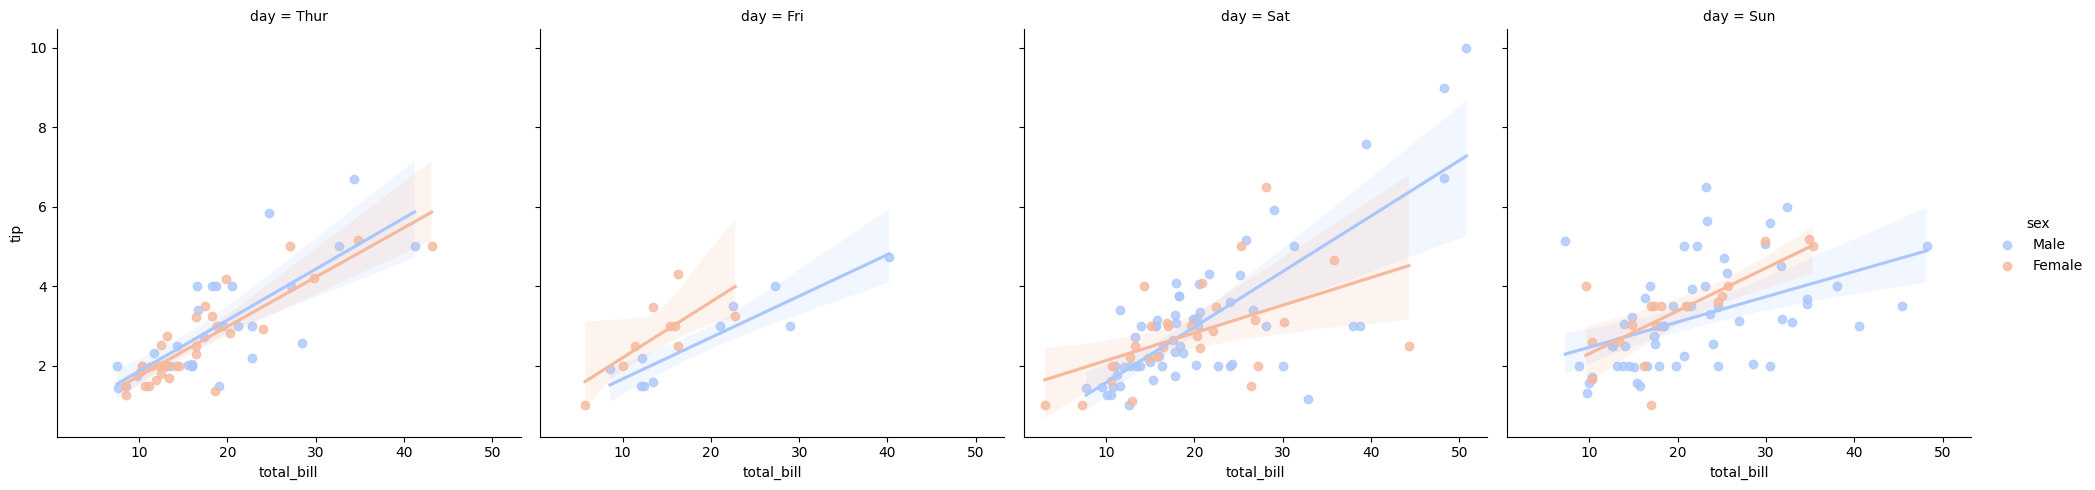

In [115]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm') # Create a linear model plot of 'total_bill' vs 'tip', with separate plots for each 'day' in columns, and colored by 'sex' using the 'coolwarm' palette

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

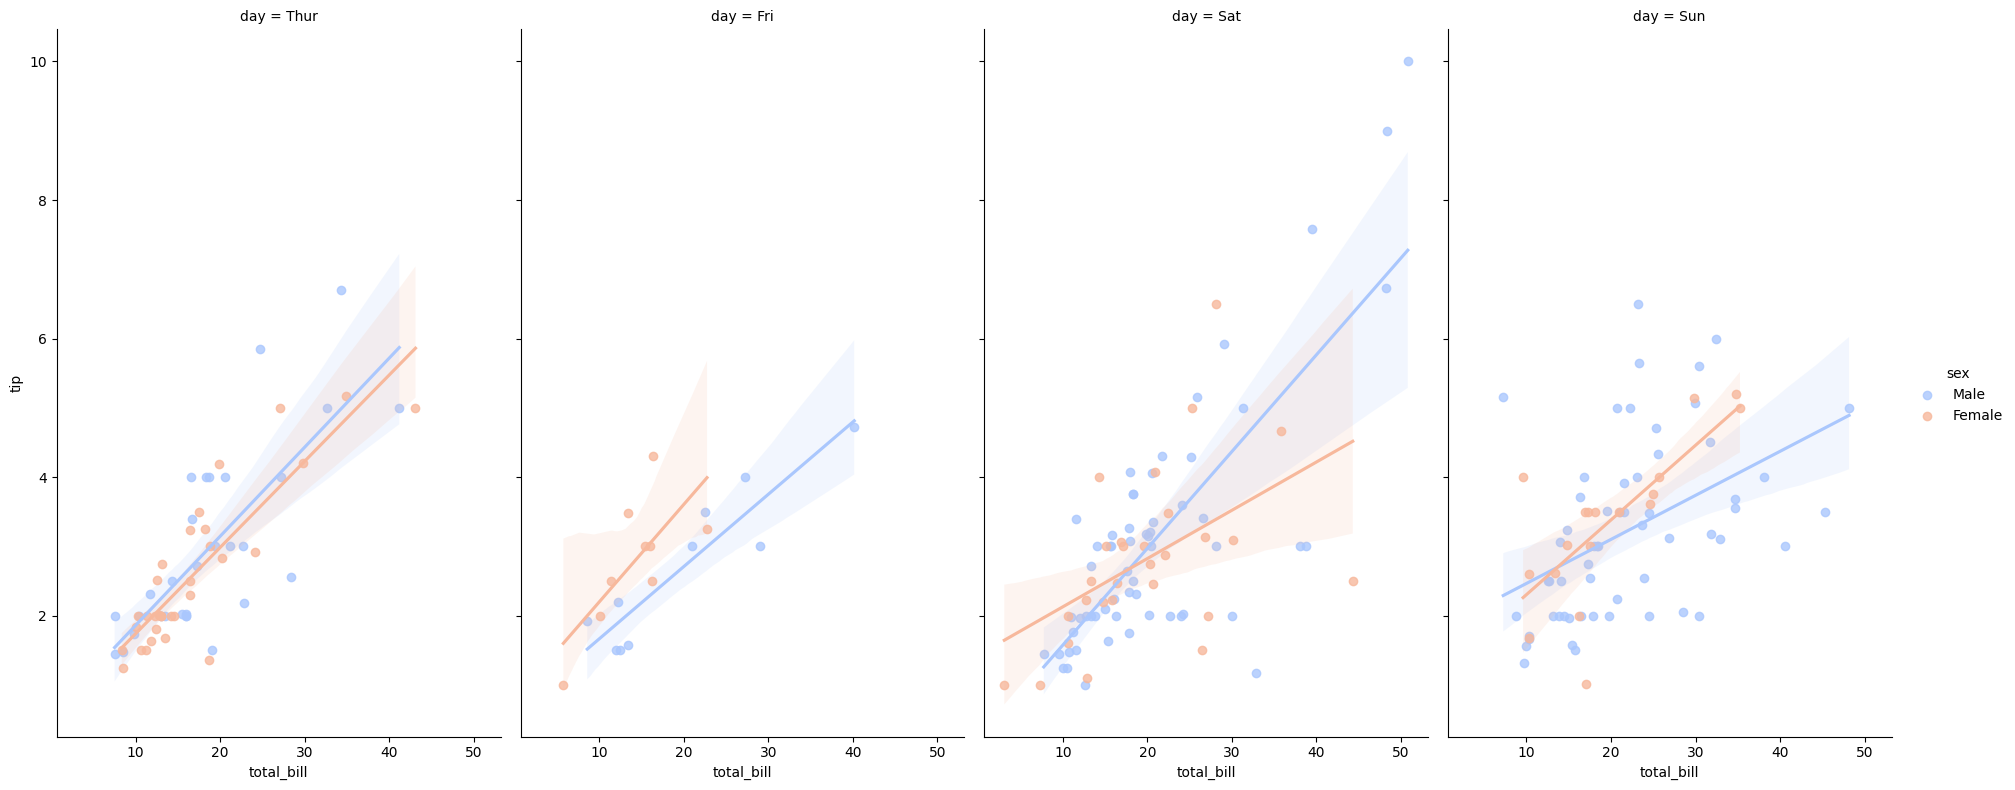

In [116]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,height=8) # Create a linear model plot with custom aspect ratio and height, showing 'total_bill' vs 'tip', separated by 'day' in columns, and colored by 'sex' using 'coolwarm' palette

### Reference:

* https://seaborn.pydata.org/ - Seaborn: statistical data visualization


* https://seaborn.pydata.org/tutorial/color_palettes.html - Color palettes